This notebook was created exclusively for the course "Raumflugmechanik"
(Spaceflight Dynamics) at FH Aachen University of Applied Sciences
by Prof. Dr. Bernd Dachwald on 03 November 2021.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Earth:
    mu = 398600.4  # Gravitational parameter in [km^3/s^2]
    R = 6378.14  # Radius in [km]
    J2 = 0.00108263  # J2

In [3]:
e = Earth()  # Create Earth object

In [4]:
class Orbit:
    def __init__(self):
        self.a = 0.0  # Semi-major axis in [km]
        self.ecc = 0.0  # Eccentricity
        self.rp = 0.0  # Pericenter radius in [km]
        self.ra = 0.0  # Apocenter radius in [km]
        self.n = 0.0  # Mean motion in [rad/s]

    def set_circ_orbit(self, r):
        self.a = r
        self.rp = r
        self.ra = r
        self.n = np.sqrt(e.mu / np.power(r, 3))

    def set_elliptic_orbit(self, hp, ha):
        self.rp = e.R + hp
        self.ra = e.R + ha
        self.a = (self.rp + self.ra) / 2
        self.ecc = 1 - self.rp / self.a
        self.n = np.sqrt(e.mu / np.power(self.a, 3))

In [5]:
def to_deg_per_day(angle):  # Converts from [rad/s] to [°/d]
    return angle * (180 / np.pi) * 86400

def calculate_prefactor(orb):  # Calculates prefactor in [°/d]
    pref = -3 * orb.n * e.J2 * np.power(e.R, 2) / (2 * np.power(orb.a, 2) * np.power(1 - np.power(orb.ecc, 2), 2))
    return to_deg_per_day(pref)

def rotation_nodal_line(i, orb):  # Calculates dOmega / dt in [°/d]
    return calculate_prefactor(orb) * np.cos(np.deg2rad(i))

def rotation_apsidal_line(i, orb):  # Calculates domega / dt in [°/d]
    return calculate_prefactor(orb) * (5/2 * np.power(np.sin(np.deg2rad(i)), 2) - 2)

In [6]:
def plot_rot_nodal_line(inc, orb):
    fig, ax = plt.subplots()
    for j in range(0, len(orb)):
        h = int(np.ceil(orb[j].a - e.R))
        ax.plot(inc, rotation_nodal_line(inc, orb[j]), '-', label='h = {} km'.format(h))
    ax.legend()

def plot_rot_apsidal_line(inc, orb):
    fig, ax = plt.subplots()
    for j in range(len(orb)):
        ha = int(np.ceil(orb[j].ra - e.R))
        ax.plot(inc, rotation_apsidal_line(inc, orb[j]), '-', label='ha = {} km'.format(ha))
    ax.legend()

In [7]:
h = [200.0, 500.0, 1000.0, 2500.0, 5000.0]  # List of altitudes in [km]
orbit_nodal_rotation = [Orbit() for j in range(0, len(h))]
for j in range(0, len(h)):
    orbit_nodal_rotation[j].set_circ_orbit(e.R + h[j])

hp = 200.0  # Pericenter altitude for apsidal rotation in [km]
ha = [200.0, 1000.0, 2500.0, 5000.0]  # List of apocenters for apsidal rotation in [km]
orbit_apsidal_rotation = [Orbit() for j in range(0, len(ha))]
for j in range(0, len(ha)):
    orbit_apsidal_rotation[j].set_elliptic_orbit(hp, ha[j])

i = np.arange(0.0, 180.0, 1.0)  # Range of inclinations in [°]

In [8]:
plt.rcParams["figure.figsize"] = (12,8)

# Plot Rotation of the Nodal Line (Ascending Node)

\begin{equation*}
    \dot\Omega = -\frac{3nJ_2R^2}{2a^2(1-e^2)^2}\cos i
\end{equation*}
with the mean motion
\begin{equation*}
n = \sqrt{\frac{\mu}{a^3}}
\end{equation*}
Note: The plot below is for circular orbits with an altitude of $h$.

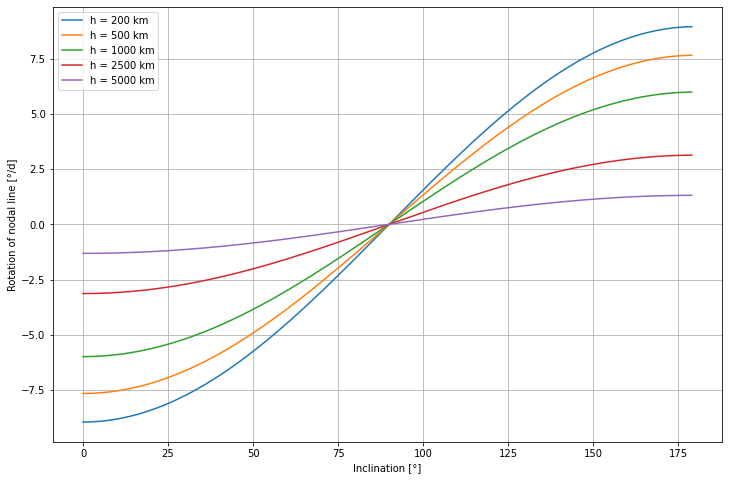

In [9]:
plot_rot_nodal_line(i, orbit_nodal_rotation)
plt.grid()
plt.xlabel("Inclination [°]")
plt.ylabel("Rotation of nodal line [°/d]")
plt.show()

# Plot the Rotation of the Apsidal Line (Pericenter)

\begin{equation*}
    \dot\omega = -\frac{3nJ_2R^2}{2a^2(1-e^2)^2}\left(\frac{5}{2}\sin^2 i -2\right)
\end{equation*}

\begin{align*}
    r_p &= R_E+h_p\\
    r_a &= R_E+h_a\\
    a &= \frac{r_p+r_a}{2}\\
    r_p &= a(1-e) \quad\Leftrightarrow\quad e = 1 - \frac{r_p}{a}
\end{align*}

Note: The plot below is for orbits with a pericenter altitude of $h_p = 200\,\mathrm{km}$ and an apocenter altitude of $h_a$.

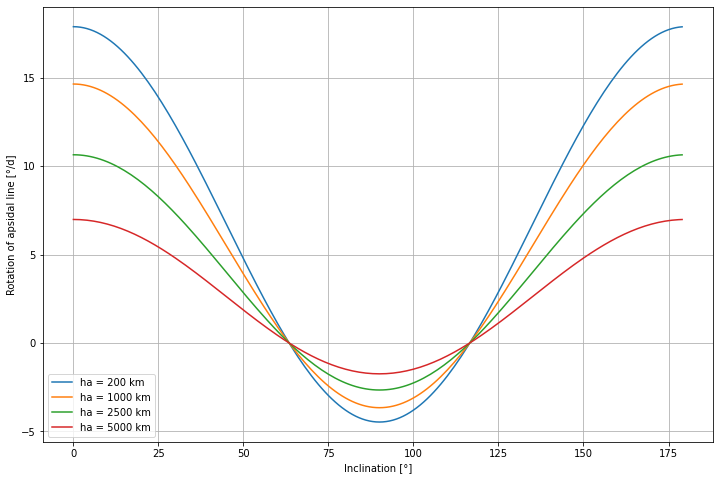

In [10]:
plot_rot_apsidal_line(i, orbit_apsidal_rotation)
plt.grid()
plt.xlabel("Inclination [°]")
plt.ylabel("Rotation of apsidal line [°/d]")
plt.show()